# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [4]:
viz = df.copy()

# Data Preparation

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(1009, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [9]:
train, test = train_test_split(df, test_size = 0.2)

In [10]:
test_pred = test.copy()

In [11]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
434,2019-10-25,270.679993,277.769989,270.179993,276.820007,276.820007,4747800
529,2020-03-13,330.510010,336.420013,307.390015,336.299988,336.299988,9458200
388,2019-08-21,301.609985,302.880005,296.200012,297.809998,297.809998,5685400
962,2021-11-30,668.200012,675.380005,640.010010,641.900024,641.900024,5608900
828,2021-05-20,489.549988,502.700012,488.980011,501.670013,501.670013,3721200
582,2020-05-29,417.459991,420.299988,411.850006,419.730011,419.730011,5254900
793,2021-03-31,515.669983,528.130005,515.440002,521.659973,521.659973,3503100
603,2020-06-29,445.230011,447.670013,432.140015,447.239990,447.239990,4844000
925,2021-10-07,642.229980,646.840027,630.450012,631.849976,631.849976,3556900
484,2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500


In [12]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
318,2019-05-13,352.290009,354.260010,343.100006,345.260010,345.260010,8026700
522,2020-03-04,377.769989,384.010010,370.510010,383.790009,383.790009,5487300
614,2020-07-15,516.299988,529.000000,510.179993,523.260010,523.260010,10066700
585,2020-06-03,426.950012,427.100006,418.049988,421.970001,421.970001,4316000
236,2019-01-14,334.239990,335.480011,329.130005,332.940002,332.940002,10499600
32,2018-03-22,313.070007,314.119995,305.660004,306.700012,306.700012,8063300
941,2021-10-29,673.059998,690.969971,671.239990,690.309998,690.309998,3817500
663,2020-09-23,491.040009,491.040009,469.000000,470.609985,470.609985,3726400
811,2021-04-27,512.619995,512.989990,504.579987,505.549988,505.549988,3761300
218,2018-12-17,266.510010,272.980011,261.079987,262.799988,262.799988,9634700


In [13]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [14]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [15]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = model_lnr.predict(x_test)

In [17]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.57089654]


# Model Evaluation

In [18]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 15.829
RMSE 3.979
MAE 3.056
MAPE 0.007
R2 Score :  0.999


# Model saving using pickle

In [19]:
import pickle
# Saving model to disk
pickle.dump(model_lnr, open('model.pkl','wb'))

# Model Visualization

In [20]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [21]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [22]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


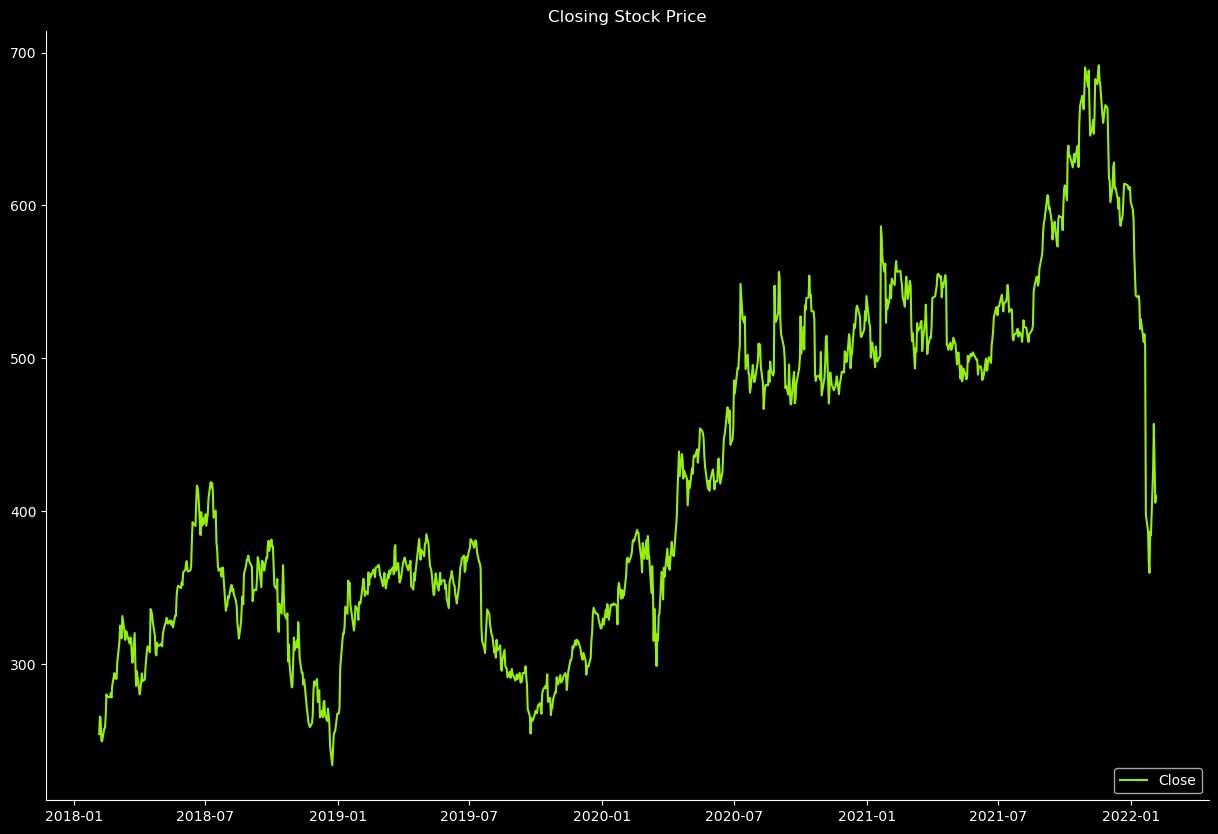

In [23]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

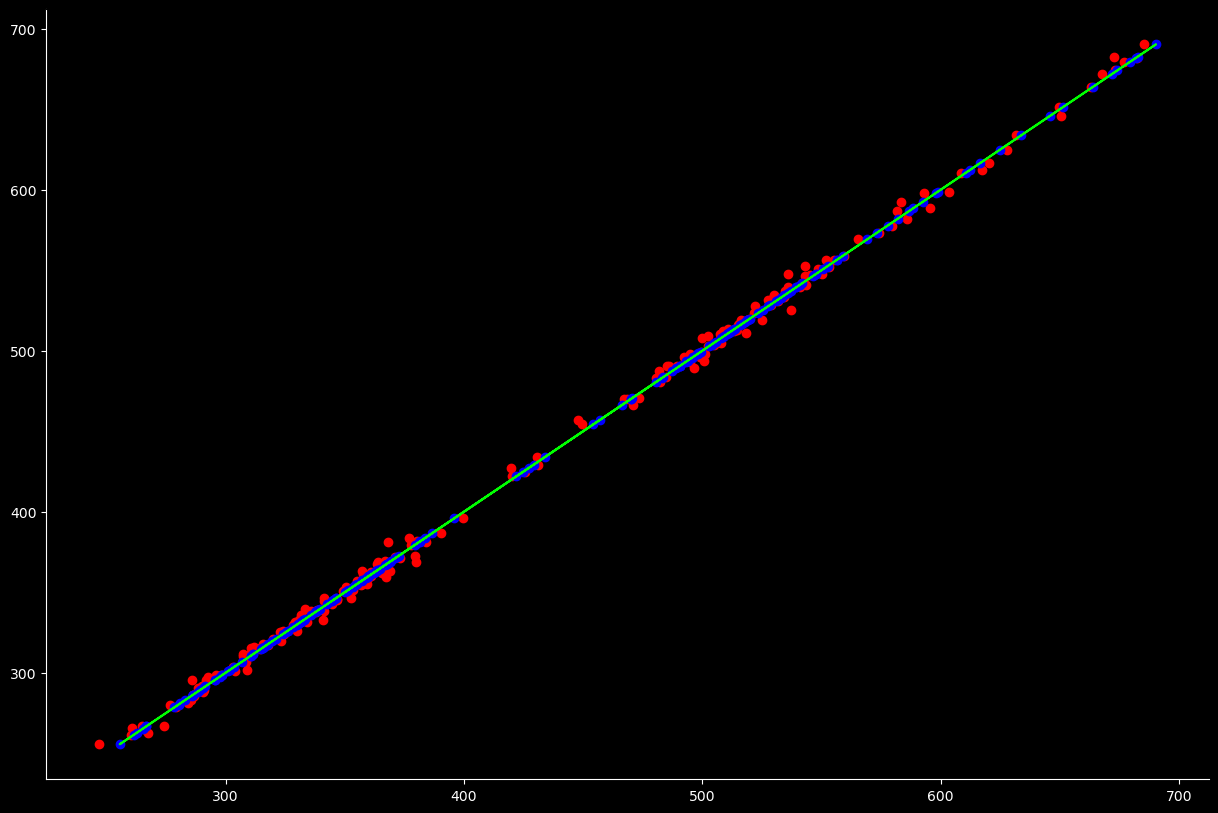

In [24]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [25]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
318,2019-05-13,352.290009,354.260010,343.100006,345.260010,345.260010,8026700,346.893970
522,2020-03-04,377.769989,384.010010,370.510010,383.790009,383.790009,5487300,376.904475
614,2020-07-15,516.299988,529.000000,510.179993,523.260010,523.260010,10066700,521.643917
585,2020-06-03,426.950012,427.100006,418.049988,421.970001,421.970001,4316000,420.159245
236,2019-01-14,334.239990,335.480011,329.130005,332.940002,332.940002,10499600,331.784024
...,...,...,...,...,...,...,...,...
616,2020-07-17,494.869995,503.589996,484.140015,492.989990,492.989990,24991400,494.811567
649,2020-09-02,553.780029,556.500000,537.369995,552.840027,552.840027,5886900,543.076387
599,2020-06-23,466.500000,474.010010,464.500000,466.260010,466.260010,5948400,470.907280
33,2018-03-23,307.410004,309.369995,300.359985,300.940002,300.940002,9529900,303.829292


In [26]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,431.728465,113.525125,255.570007,333.005004,391.250000,518.909973,690.309998
Close_Prediction,202.0,431.110444,113.317235,246.966598,333.344993,394.991692,518.465472,685.304261


**Actual Close Price vs. Predicted Close Price**
<div class="flourish-embed flourish-chart" data-src="visualisation/13412598"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

# Saving the Data as CSV

In [27]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [28]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-06,265.720001,260.536763
2018-02-07,NaN,NaN
2018-02-08,NaN,NaN
2018-02-09,NaN,NaN
2018-02-10,NaN,NaN
...,...,...
2022-01-28,NaN,NaN
2022-01-29,NaN,NaN
2022-01-30,NaN,NaN


In [56]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
